In [1]:
print ("Starting")

Starting


In [3]:
import pandas as pd

In [5]:
df  = pd.read_csv(r"C:\Users\kannapr1\Downloads\Insurance Risk and Claim Dataset.csv")

In [13]:
print("--------Head shows top 5 records from the dataset")
df.head()

--------Head shows top 5 records from the dataset


,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,POL000001,56.0,Female,Health,73968.80,1,0,3547.17,14048.25,Low
1,POL000002,69.0,Male,Health,128978.03,1,0,2306.97,3901.69,Low
2,POL000003,46.0,Female,Health,77282.87,3,0,926.91,1773.26,Medium
3,POL000004,32.0,Female,Life,65488.60,1,1,5095.42,28134.45,High
4,POL000005,60.0,Male,Health,59238.54,0,1,4688.19,15809.77,High


In [15]:
print("----------info shows information about the dataset including shape and structure")
df.info()

----------info shows information about the dataset including shape and structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Policy_ID         5000 non-null   object 
 1   Customer_Age      4838 non-null   float64
 2   Gender            4757 non-null   object 
 3   Policy_Type       4834 non-null   object 
 4   Annual_Income     4836 non-null   float64
 5   Claim_History     5000 non-null   int64  
 6   Fraudulent_Claim  5000 non-null   int64  
 7   Premium_Amount    5000 non-null   float64
 8   Claim_Amount      5000 non-null   float64
 9   Risk_Score        5000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 390.8+ KB


In [19]:
print("--------- Show all the NULL values for handling missing information")
df.isnull().sum()

--------- Show all the NULL values for handling missing information


Policy_ID             0
Customer_Age        162
Gender              243
Policy_Type         166
Annual_Income       164
Claim_History         0
Fraudulent_Claim      0
Premium_Amount        0
Claim_Amount          0
Risk_Score            0
dtype: int64

In [23]:
print("Fill missing categorical values using mode imputation (for Policy Type, Gender).")
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

Fill missing categorical values using mode imputation (for Policy Type, Gender).


In [25]:
df.isnull().sum()

Policy_ID             0
Customer_Age        162
Gender                0
Policy_Type         166
Annual_Income       164
Claim_History         0
Fraudulent_Claim      0
Premium_Amount        0
Claim_Amount          0
Risk_Score            0
dtype: int64

In [27]:
df['Policy_Type'].fillna(df['Policy_Type'].mode()[0], inplace=True)

C:\Users\kannapr1\AppData\Local\Temp\ipykernel_41312\198855524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Policy_Type'].fillna(df['Policy_Type'].mode()[0], inplace=True)


In [29]:
df.isnull().sum()

Policy_ID             0
Customer_Age        162
Gender                0
Policy_Type           0
Annual_Income       164
Claim_History         0
Fraudulent_Claim      0
Premium_Amount        0
Claim_Amount          0
Risk_Score            0
dtype: int64

In [31]:
print("Fill missing numeric values using median imputation (for Income, Age).")
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)

Fill missing numeric values using median imputation (for Income, Age).


C:\Users\kannapr1\AppData\Local\Temp\ipykernel_41312\2464877077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
C:\Users\kannapr1\AppData\Local\Temp\ipykernel_41312\2464877077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [33]:
df.isnull().sum()

Policy_ID           0
Customer_Age        0
Gender              0
Policy_Type         0
Annual_Income       0
Claim_History       0
Fraudulent_Claim    0
Premium_Amount      0
Claim_Amount        0
Risk_Score          0
dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
encoder = OneHotEncoder(sparse_output=False)

In [39]:
encoded_data = encoder.fit_transform(df[['Policy_Type', 'Gender']])

In [41]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Policy_Type', 'Gender']))

In [43]:
df = pd.concat([df.drop(columns=['Policy_Type', 'Gender']), encoded_df], axis=1)

In [47]:
df.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,POL000001,56.0,73968.80,1,0,3547.17,14048.25,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,POL000002,69.0,128978.03,1,0,2306.97,3901.69,Low,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,POL000003,46.0,77282.87,3,0,926.91,1773.26,Medium,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,POL000004,32.0,65488.60,1,1,5095.42,28134.45,High,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,POL000005,60.0,59238.54,0,1,4688.19,15809.77,High,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
print("Starting Label Encoding")
from sklearn.preprocessing import LabelEncoder

Starting Label Encoding


In [51]:
encoder = LabelEncoder()

In [55]:
df['Risk_Score_E'] = encoder.fit_transform(df['Risk_Score'])

In [57]:
df.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_E
0,POL000001,56.0,73968.80,1,0,3547.17,14048.25,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,POL000002,69.0,128978.03,1,0,2306.97,3901.69,Low,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,POL000003,46.0,77282.87,3,0,926.91,1773.26,Medium,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
3,POL000004,32.0,65488.60,1,1,5095.42,28134.45,High,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,POL000005,60.0,59238.54,0,1,4688.19,15809.77,High,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [59]:
print ("Normalize numerical features like Annual_Income, Claim_Amount, Premium_Amount using MinMaxScaler.")

Normalize numerical features like Annual_Income, Claim_Amount, Premium_Amount using MinMaxScaler.


In [61]:
from sklearn.preprocessing import MinMaxScaler


In [63]:
scaler = MinMaxScaler()

In [65]:
df[['Annual_Income', 'Claim_Amount', 'Premium_Amount']] = scaler.fit_transform(df[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])

In [67]:
df

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_E
0,POL000001,56.0,0.366407,1,0,0.468867,0.467360,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,POL000002,69.0,0.824817,1,0,0.277913,0.127340,Low,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,POL000003,46.0,0.394024,3,0,0.065424,0.056014,Medium,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
3,POL000004,32.0,0.295738,1,1,0.707252,0.939401,High,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,POL000005,60.0,0.243655,0,1,0.644551,0.526390,High,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,POL004996,42.0,0.056850,1,0,0.680266,0.405022,Low,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4996,POL004997,39.0,0.816194,4,0,0.605561,0.348148,High,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4997,POL004998,114.0,0.119884,1,0,0.320144,0.102679,Low,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4998,POL004999,34.0,0.588518,0,0,0.483370,0.042709,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [69]:
import seaborn as sns


<Axes: ylabel='Claim_Amount'>

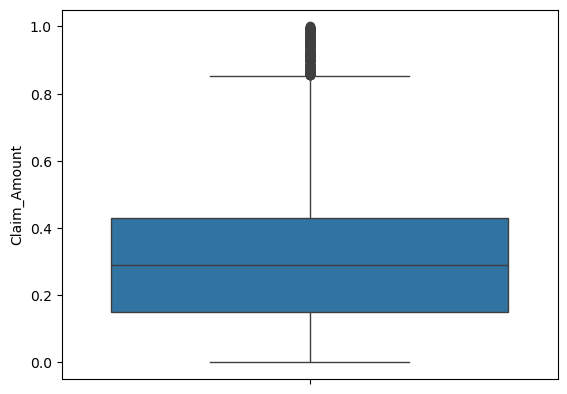

In [70]:
sns.boxplot(df['Claim_Amount'])

<Axes: xlabel='Claim_Amount', ylabel='Count'>

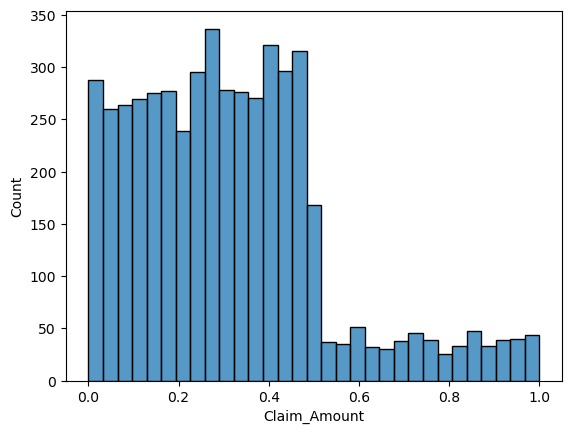

In [73]:
sns.histplot(df['Claim_Amount'])

In [85]:
Q1 = df['Claim_Amount'].quantile(0.25)
Q3 = df['Claim_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Claim_Amount'] >= lower_bound) & (df['Claim_Amount'] <= upper_bound)]

df


,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_E
0,POL000001,56.0,0.366407,1,0,0.468867,0.467360,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,POL000002,69.0,0.824817,1,0,0.277913,0.127340,Low,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,POL000003,46.0,0.394024,3,0,0.065424,0.056014,Medium,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
4,POL000005,60.0,0.243655,0,1,0.644551,0.526390,High,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5,POL000006,25.0,0.716059,1,0,0.433677,0.438773,Low,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,POL004996,42.0,0.056850,1,0,0.680266,0.405022,Low,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4996,POL004997,39.0,0.816194,4,0,0.605561,0.348148,High,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4997,POL004998,114.0,0.119884,1,0,0.320144,0.102679,Low,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4998,POL004999,34.0,0.588518,0,0,0.483370,0.042709,Low,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: ylabel='Claim_Amount'>

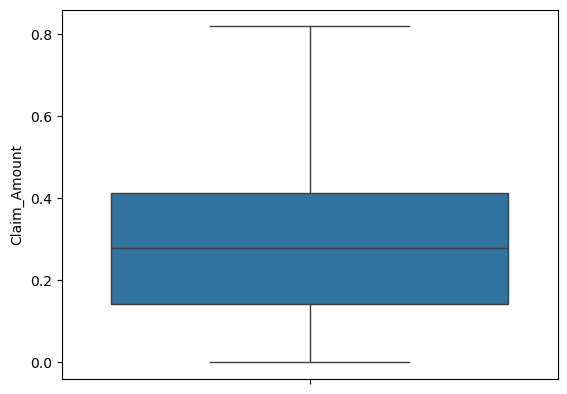

In [87]:
sns.boxplot(df['Claim_Amount'])

In [89]:
df.shape

(4779, 16)

In [ ]:
df.head()

In [91]:
from sklearn.ensemble import IsolationForest

In [95]:


iso_forest = IsolationForest(n_estimators = 100, contamination = 0.05, random_state=42)

In [97]:
iso_forest.fit(df)

ValueError: could not convert string to float: 'POL000001'

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Policy_ID             4779 non-null   object 
 1   Customer_Age          4779 non-null   float64
 2   Annual_Income         4779 non-null   float64
 3   Claim_History         4779 non-null   int64  
 4   Fraudulent_Claim      4779 non-null   int64  
 5   Premium_Amount        4779 non-null   float64
 6   Claim_Amount          4779 non-null   float64
 7   Risk_Score            4779 non-null   object 
 8   Policy_Type_Auto      4779 non-null   float64
 9   Policy_Type_Health    4779 non-null   float64
 10  Policy_Type_Life      4779 non-null   float64
 11  Policy_Type_Property  4779 non-null   float64
 12  Gender_Female         4779 non-null   float64
 13  Gender_Male           4779 non-null   float64
 14  Gender_Other          4779 non-null   float64
 15  Risk_Score_E          4779

In [101]:
df_Iso = df.drop(columns = ['Policy_ID', 'Risk_Score'])

In [103]:
df_Iso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Age          4779 non-null   float64
 1   Annual_Income         4779 non-null   float64
 2   Claim_History         4779 non-null   int64  
 3   Fraudulent_Claim      4779 non-null   int64  
 4   Premium_Amount        4779 non-null   float64
 5   Claim_Amount          4779 non-null   float64
 6   Policy_Type_Auto      4779 non-null   float64
 7   Policy_Type_Health    4779 non-null   float64
 8   Policy_Type_Life      4779 non-null   float64
 9   Policy_Type_Property  4779 non-null   float64
 10  Gender_Female         4779 non-null   float64
 11  Gender_Male           4779 non-null   float64
 12  Gender_Other          4779 non-null   float64
 13  Risk_Score_E          4779 non-null   int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 541.4 KB


In [107]:
iso_forest.fit(df_Iso)

IsolationForest(contamination=0.05, random_state=42)

In [111]:
df_Iso['Anomaly']=iso_forest.predict(df_Iso)

In [113]:
df_Iso['Anomaly'].value_counts()

Anomaly
 1    4540
-1     239
Name: count, dtype: int64

In [123]:
df_Iso[df_Iso['Anomaly'] == -1]

,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_E,Anomaly
43,33.0,0.807870,2,0,0.657126,0.497107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,-1
45,79.0,0.270073,3,1,0.865665,0.595322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,-1
47,64.0,0.523902,2,1,0.859360,0.782761,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,-1
54,20.0,0.314987,1,0,0.465792,0.406594,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,-1
76,24.0,0.669033,1,1,0.952531,0.527776,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,63.0,0.328594,4,0,0.323195,0.088527,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,-1
4943,49.0,0.538642,0,1,0.853166,0.585473,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,-1
4949,55.0,0.006352,2,1,0.900375,0.758862,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-1
4961,19.0,0.320899,0,1,0.422861,0.485918,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-1


In [125]:
df = df_Iso[df_Iso['Anomaly'] != -1]

In [129]:
df.shape

(4540, 15)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4540 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Age          4540 non-null   float64
 1   Annual_Income         4540 non-null   float64
 2   Claim_History         4540 non-null   int64  
 3   Fraudulent_Claim      4540 non-null   int64  
 4   Premium_Amount        4540 non-null   float64
 5   Claim_Amount          4540 non-null   float64
 6   Policy_Type_Auto      4540 non-null   float64
 7   Policy_Type_Health    4540 non-null   float64
 8   Policy_Type_Life      4540 non-null   float64
 9   Policy_Type_Property  4540 non-null   float64
 10  Gender_Female         4540 non-null   float64
 11  Gender_Male           4540 non-null   float64
 12  Gender_Other          4540 non-null   float64
 13  Risk_Score_E          4540 non-null   int32  
 14  Anomaly               4540 non-null   int32  
dtypes: float64(11), int32(2), 